In [ ]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clean visuals
sns.set(style='whitegrid')


In [ ]:
# Load cheese and weather datasets
cheese_df = pd.read_csv('cheese_data.csv')
weather_df = pd.read_csv('canada_weather.csv')

# View first few rows
cheese_df.head()



In [ ]:
weather_df.head()

In [ ]:
# Extract Celsius values from temperature strings
def extract_celsius(temp_str):
    import re
    match = re.search(r'(-?\d+\.?\d*)', str(temp_str))
    return float(match.group(1)) if match else None

weather_df['Annual_High_C'] = weather_df['Annual(Avg. high °C (°F))'].apply(extract_celsius)
weather_df['Annual_Low_C'] = weather_df['Annual(Avg. low °C (°F))'].apply(extract_celsius)

# Extract province code from community name
weather_df['ProvinceCode'] = weather_df['Community'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else None)

# Drop any missing province codes
weather_df = weather_df.dropna(subset=['ProvinceCode'])

weather_df[['Community', 'ProvinceCode', 'Annual_High_C', 'Annual_Low_C']].head()



In [ ]:
weather_by_province = weather_df.groupby('ProvinceCode').agg({
    'Annual_High_C': 'mean',
    'Annual_Low_C': 'mean'
}).reset_index().round(2)

weather_by_province.head()


In [ ]:
# Rename for consistency
cheese_df = cheese_df.rename(columns={'ManufacturerProvCode': 'ProvinceCode'})

# Merge
cheese_weather_df = pd.merge(cheese_df, weather_by_province, on='ProvinceCode', how='left')

# Preview
cheese_weather_df[['CheeseName', 'ProvinceCode', 'Annual_High_C', 'MoisturePercent', 'FatLevel']].head()


In [21]:
# Group by province and get average cheese moisture and organic ratio
cheese_summary = cheese_weather_df.groupby('ProvinceCode').agg({
    'MoisturePercent': 'mean',
    'Organic': 'mean'
}).reset_index()

# Merge temperature data again for plotting
cheese_summary = pd.merge(cheese_summary, weather_by_province, on='ProvinceCode')
cheese_summary = cheese_summary.round(2)

# Preview
cheese_summary.head()


,ProvinceCode,MoisturePercent,Organic,Annual_High_C,Annual_Low_C
0,AB,42.35,0.00,8.43,3.37
1,BC,41.49,0.31,12.24,4.46
2,MB,41.55,0.09,4.80,7.50
3,NB,49.60,0.11,10.53,0.87
4,NL,39.50,0.00,6.57,2.97


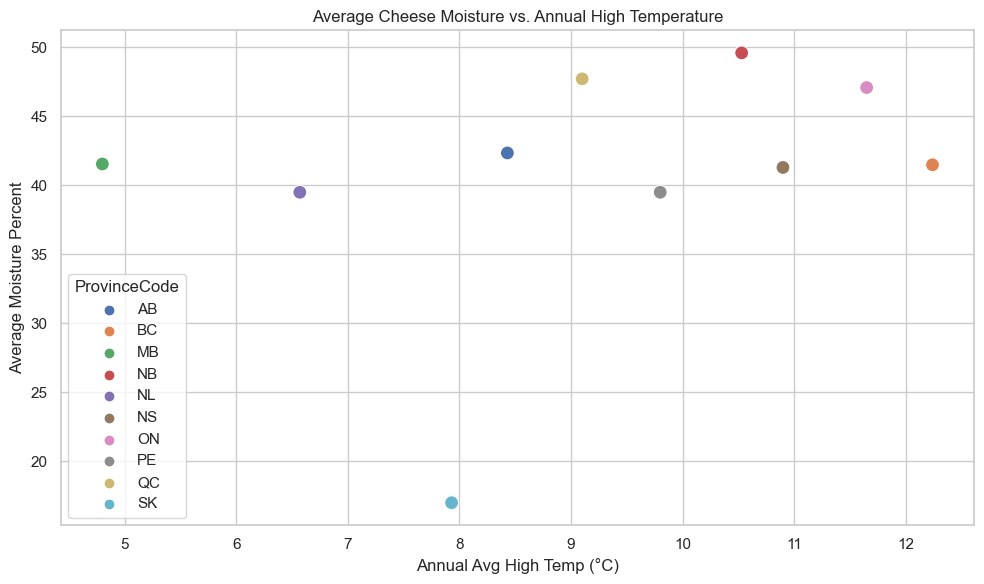

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cheese_summary, x='Annual_High_C', y='MoisturePercent', hue='ProvinceCode', s=100)
plt.title('Average Cheese Moisture vs. Annual High Temperature')
plt.xlabel('Annual Avg High Temp (°C)')
plt.ylabel('Average Moisture Percent')
plt.grid(True)
plt.tight_layout()
plt.show()


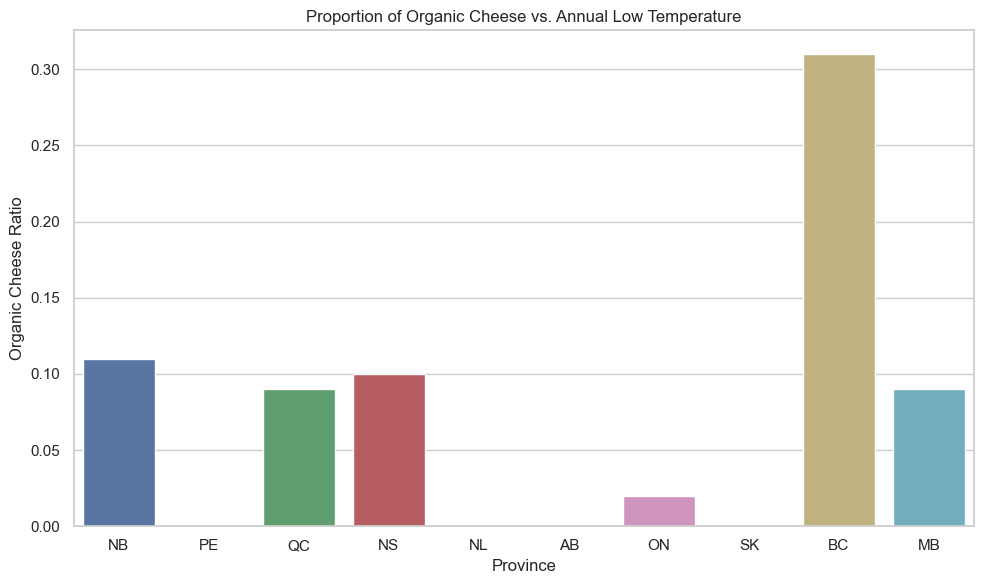

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cheese_summary.sort_values(by='Annual_Low_C'), x='ProvinceCode', y='Organic')
plt.title('Proportion of Organic Cheese vs. Annual Low Temperature')
plt.xlabel('Province')
plt.ylabel('Organic Cheese Ratio')
plt.tight_layout()
plt.show()
